In [7]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from glob import glob

Prior code from mva:

In [8]:
def read_xy(path: str):
    df = pd.read_csv(path, skipinitialspace=True)
    df['N'] = df.index + 1
    df['r'] = (df.x ** 2 + df.y ** 2) ** 0.5
    df['cr'] = df.r.cummax()
    df['fd'] = np.log(df.N) / np.log(df.cr)

    return df


def read_load_dir(load_dir: str):
    paths = glob(f'{load_dir}/*.csv')
    return [read_xy(path) for path in paths]


# We expect the format of sp data to be:
# ROOT/{probability}/{RUN_ID}.csv

def read_sp_load_dir(load_dir: str):
    probability = float(Path(load_dir).name)
    return probability, read_load_dir(load_dir)


def read_sp_full(root: str):
    if not Path(root).exists():
        raise Exception("Root does not exist")

    raw_data = [read_sp_load_dir(load_dir) for load_dir in glob(f'{root}/*')]
    fd_data = [fd_stats(dfs) for (p, dfs) in raw_data]
    probabilities = [p for (p, dfs) in raw_data]
    fd_means, fd_stds = list(zip(*fd_data))
    out = pd.DataFrame(zip(probabilities, fd_means, fd_stds), columns=['p', 'fd_mean', 'fd_std'])
    out.sort_values(by='p', inplace=True)

    return out

In [27]:
def convergent_tail_index(series, tol):
    diffs = np.abs(np.ediff1d(series))
    for i in range(0, len(diffs)):
        if np.max(diffs[i:]) <= tol:
            return i

    # No convergence found
    return None


def mean_of_tail(series, tol=0.05):
    tail_index = convergent_tail_index(series, tol)
    if tail_index is None:
        raise Exception("No convergence found.")

    return np.mean(series[tail_index:])


def fd_stats(dfs):
    fds = [mean_of_tail(df.fd, 0.1) for df in dfs]
    fds_clean = [f for f in fds if f < np.inf]
    return np.mean(fds_clean), np.mean(fds_clean) / np.sqrt(fds_clean.length())

In [50]:
raw_data[0][1][0].shape[0]

2000

In [48]:
raw_data = [read_sp_load_dir(load_dir) for load_dir in glob(f'{"../data/stick-probability"}/*')]

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [29]:
fd_data = [fd_stats(dfs) for (p, dfs) in raw_data]

In [30]:
c_sticking_probability = read_sp_full("../data/stick-probability")

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

In [31]:
rust_sticking_probability = read_sp_full("../data/rust-sticking-probability")

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

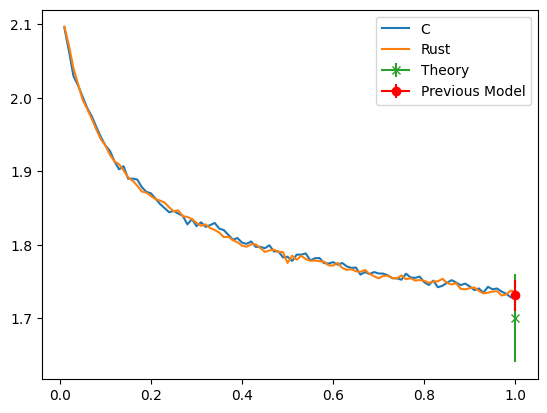

In [32]:
plt.plot(c_sticking_probability.p, c_sticking_probability.fd_mean)
plt.plot(rust_sticking_probability.p, rust_sticking_probability.fd_mean)
plt.errorbar([1], [1.70], marker='x', yerr=[0.06])
plt.errorbar([1], [1.7311567309540636], marker='o', color='red', yerr=[0.020648406595153657])
plt.legend(["C", "Rust", "Theory", "Previous Model"])

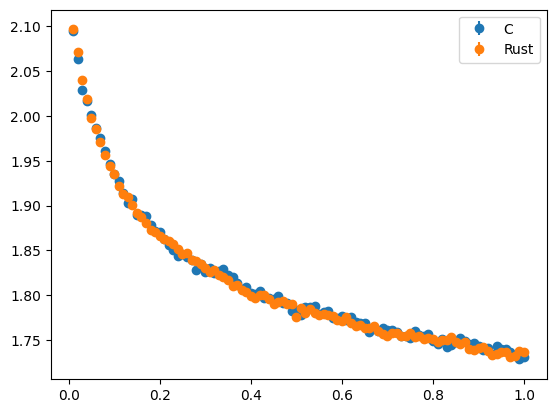

In [33]:
plt.errorbar(c_sticking_probability.p, c_sticking_probability.fd_mean, c_sticking_probability.fd_std, fmt="o")
plt.errorbar(rust_sticking_probability.p, rust_sticking_probability.fd_mean, rust_sticking_probability.fd_std, fmt="o")
plt.legend(["C", "Rust"])

Hmmm even with a different RNG I still get a dip around 0.6, I think theres something hiding there

In [4]:
hy = pd.read_json("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/rust-codebase/t333big.json")

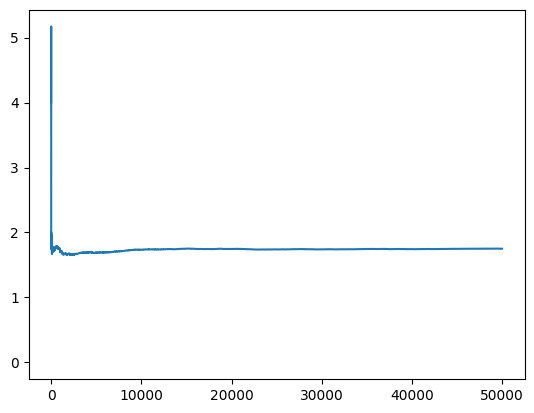

In [6]:
plt.plot(hy.fd)

In [36]:
c_sticking_probability.fd_std[1]

0.003319087035275236